In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


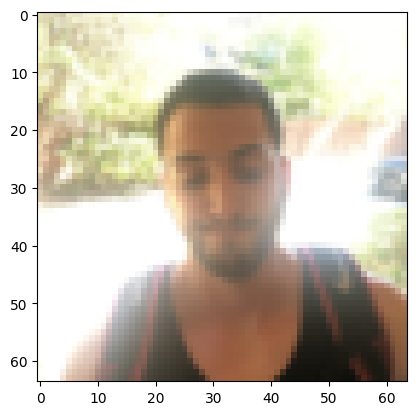

In [5]:
index = 124
plt.imshow(X_train_orig[index])
plt.show()

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Take help from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 
 
 

In [7]:
def happyModel():

    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D(padding=(3,3),input_shape=(64, 64, 3), data_format="channels_last"),
            
            ## Conv2D with 32 7x7 filters and stride of 1
            tf.keras.layers.Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0'),
            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis = 3, name = 'bn0'),
            ## ReLU
            tf.keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPooling2D((2, 2), name='max_pool0'),
            ## Flatten layer
            tf.keras.layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1, activation='sigmoid', name='fc'),
        ])
    
    return model

In [9]:
happy_model = happyModel()

In [10]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [11]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 70, 70, 3)         0         
 ing2D)                                                          
                                                                 
 conv0 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 bn0 (BatchNormalization)    (None, 64, 64, 32)        128       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pool0 (MaxPooling2D)    (None, 32, 32, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                      

In [12]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 2s 32ms/step - loss: 1.3554 - accuracy: 0.6617
Epoch 2/10
38/38 [==============================] - 1s 34ms/step - loss: 0.2424 - accuracy: 0.9017
Epoch 3/10
38/38 [==============================] - 1s 33ms/step - loss: 0.1301 - accuracy: 0.9517
Epoch 4/10
38/38 [==============================] - 1s 33ms/step - loss: 0.1404 - accuracy: 0.9583
Epoch 5/10
38/38 [==============================] - 1s 31ms/step - loss: 0.1332 - accuracy: 0.9550
Epoch 6/10
38/38 [==============================] - 1s 30ms/step - loss: 0.0773 - accuracy: 0.9750
Epoch 7/10
38/38 [==============================] - 1s 31ms/step - loss: 0.1152 - accuracy: 0.9517
Epoch 8/10
38/38 [==============================] - 1s 31ms/step - loss: 0.1185 - accuracy: 0.9683
Epoch 9/10
38/38 [==============================] - 1s 32ms/step - loss: 0.0746 - accuracy: 0.9667
Epoch 10/10
38/38 [==============================] - 1s 32ms/step - loss: 0.0773 - accuracy: 0.9667


In [13]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 18ms/step - loss: 0.2879 - accuracy: 0.8733


[0.2878507971763611, 0.8733333349227905]

## 4 - The Functional API

 where you'll use Keras' flexible [Functional API](https://www.tensorflow.org/guide/keras/functional) to build a ConvNet that can differentiate between 6 sign language digits. 

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one. 

In the visual example below, the one possible direction of the movement Sequential model is shown in contrast to a skip connection, which is just one of the many ways a Functional model can be constructed. A skip connection, as you might have guessed, skips some layer in the network and feeds the output to a later layer in the network. Don't worry, you'll be spending more time with skip connections very soon! 

In [14]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


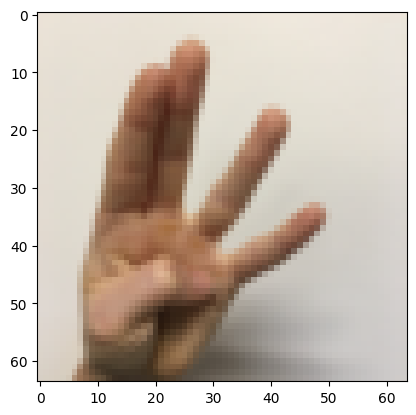

In [15]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [16]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [17]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tf.keras.layers.Conv2D(filters = 8 , kernel_size= (4,4), strides = (1,1), padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8, 8), padding='same')(A1)
    Z2 = tf.keras.layers.Conv2D(filters = 16 , kernel_size= (2,2), strides = (1,1), padding='same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4, 4), padding='same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [18]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_3 (ReLU)              (None, 8, 8, 16)          0         
                                                             

## train the model

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 35ms/step - loss: 1.9017 - accuracy: 0.1694 - val_loss: 1.7924 - val_accuracy: 0.1917
Epoch 2/100
17/17 [==============================] - 0s 26ms/step - loss: 1.7847 - accuracy: 0.2148 - val_loss: 1.7801 - val_accuracy: 0.2167
Epoch 3/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7773 - accuracy: 0.2194 - val_loss: 1.7738 - val_accuracy: 0.2667
Epoch 4/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7712 - accuracy: 0.2815 - val_loss: 1.7674 - val_accuracy: 0.3500
Epoch 5/100
17/17 [==============================] - 0s 24ms/step - loss: 1.7659 - accuracy: 0.3093 - val_loss: 1.7618 - val_accuracy: 0.3500
Epoch 6/100
17/17 [==============================] - 0s 27ms/step - loss: 1.7594 - accuracy: 0.3278 - val_loss: 1.7548 - val_accuracy: 0.3500
Epoch 7/100
17/17 [==============================] - 0s 27ms/step - loss: 1.7523 - accuracy: 0.3556 - val_loss: 1.7466 - val_accuracy: 0.4000
Epoch 

In [20]:
history.history

{'loss': [1.9016917943954468,
  1.7847049236297607,
  1.7772738933563232,
  1.771154522895813,
  1.7658603191375732,
  1.7594391107559204,
  1.7523448467254639,
  1.743249773979187,
  1.7334730625152588,
  1.721577763557434,
  1.7063100337982178,
  1.6881028413772583,
  1.6674188375473022,
  1.6407489776611328,
  1.6095926761627197,
  1.571694016456604,
  1.5283583402633667,
  1.479483962059021,
  1.4250092506408691,
  1.369489312171936,
  1.3136472702026367,
  1.2580463886260986,
  1.205154538154602,
  1.15448796749115,
  1.1080739498138428,
  1.0638772249221802,
  1.0243622064590454,
  0.9885850548744202,
  0.9561867117881775,
  0.9277098178863525,
  0.9003296494483948,
  0.8752850294113159,
  0.8531867265701294,
  0.8317221999168396,
  0.8122150301933289,
  0.7938224077224731,
  0.7764577269554138,
  0.7608436942100525,
  0.7449395060539246,
  0.730940043926239,
  0.7168951630592346,
  0.7037506103515625,
  0.6909995675086975,
  0.679127037525177,
  0.6678035259246826,
  0.656705081

C:\Users\MSI LAPTOP\AppData\Local\Temp\ipykernel_3556\973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\MSI LAPTOP\AppData\Local\Temp\ipykernel_3556\973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

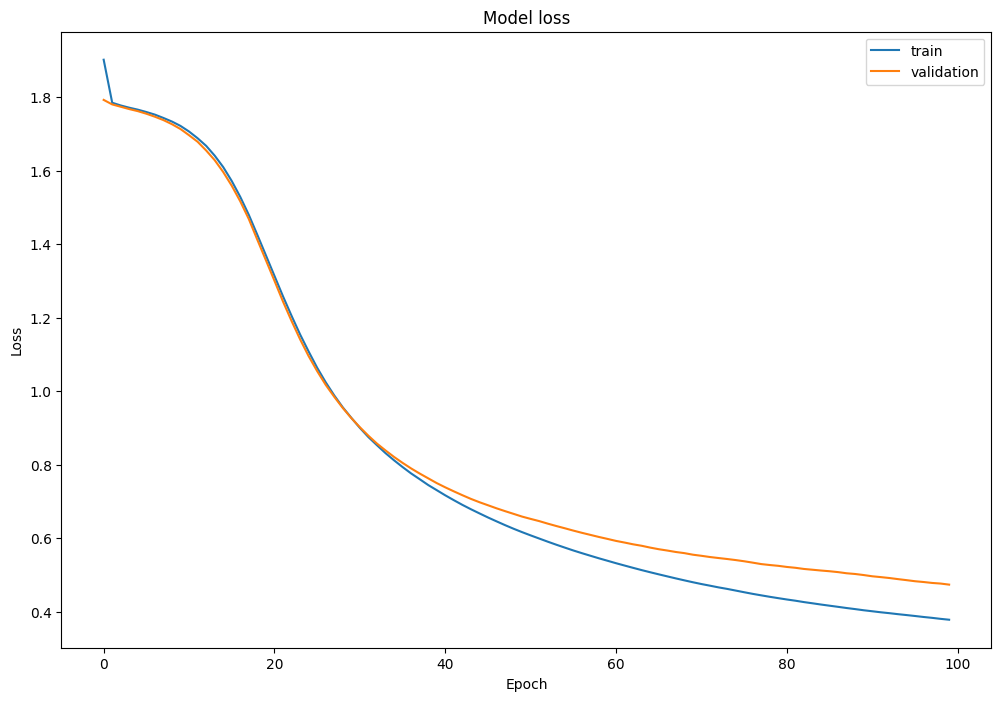

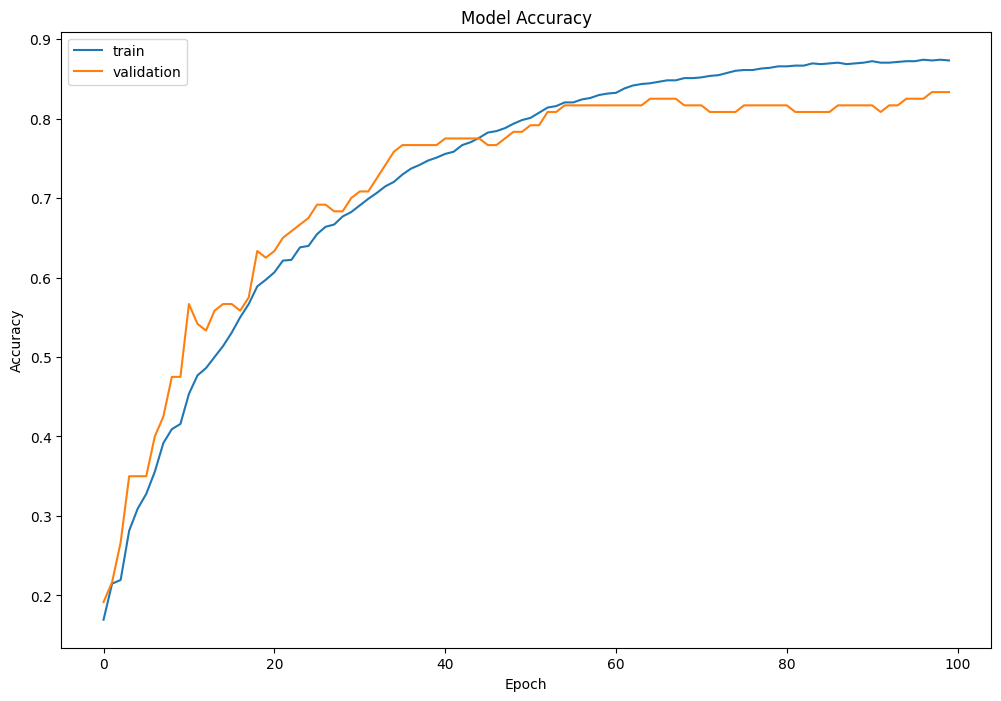

In [21]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')